# <center> Визуализация данных в Seaborn. 

In [1]:
#отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline

import pandas as pd
import seaborn as sns

**Pandas** — это Excel в командной строке с удобной функциональностью по вводу/выводу и обработке табличных данных.

**Данные по моделям месяца по версии журнала Playboy.**

In [2]:
girls = pd.read_csv('data/girls.csv')
girls.head(10)

,Month,Year,Bust,Waist,Hips,Height,Weight
0,December,1953,91,61,91,165,54
1,March,1954,86,61,89,168,54
2,July,1955,91,61,91,166,52
3,December,1955,91,61,91,166,52
4,July,1956,91,61,86,157,48
5,August,1956,94,61,91,170,55
6,October,1956,91,61,91,166,52
7,November,1956,99,56,91,160,58
8,December,1956,89,58,89,157,48
9,January,1957,91,64,91,165,54


In [3]:
girls.Year.unique()

array([1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009])

In [4]:
girls.describe(include='all')

,Month,Year,Bust,Waist,Hips,Height,Weight
count,604,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000
unique,12,NaN,NaN,NaN,NaN,NaN,NaN
top,December,NaN,NaN,NaN,NaN,NaN,NaN
freq,54,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1983.057947,89.293046,59.529801,87.942053,167.887417,52.168874
std,NaN,14.843740,3.994011,3.616909,3.479142,5.776711,4.040585
min,NaN,1953.000000,81.000000,46.000000,61.000000,150.000000,42.000000
25%,NaN,1970.000000,86.000000,58.000000,86.000000,165.000000,49.000000
50%,NaN,1983.000000,89.000000,61.000000,89.000000,168.000000,52.000000
75%,NaN,1996.000000,91.000000,61.000000,91.000000,173.000000,54.000000


**Методы hist, plot**

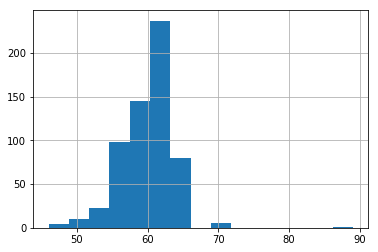

In [5]:
girls['Waist'].hist(bins=15)

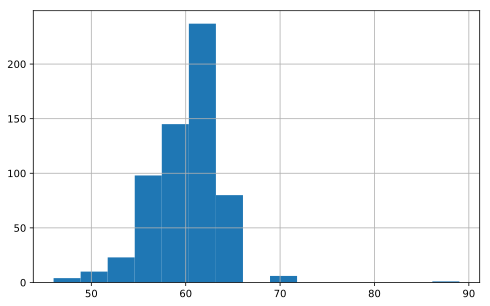

In [6]:
#графики в  Scalable Vector Graphics выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

girls['Waist'].hist(bins=15);

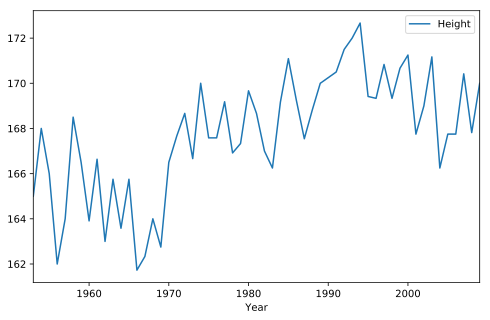

In [7]:
girls[['Height','Year']].groupby('Year').mean().plot();

**Seaborn** - дополнение Matplotlib с API как для быстрого построения красивых графиков, так и для детальной кастомизации картинок для презентации.

**Метод pairplot**

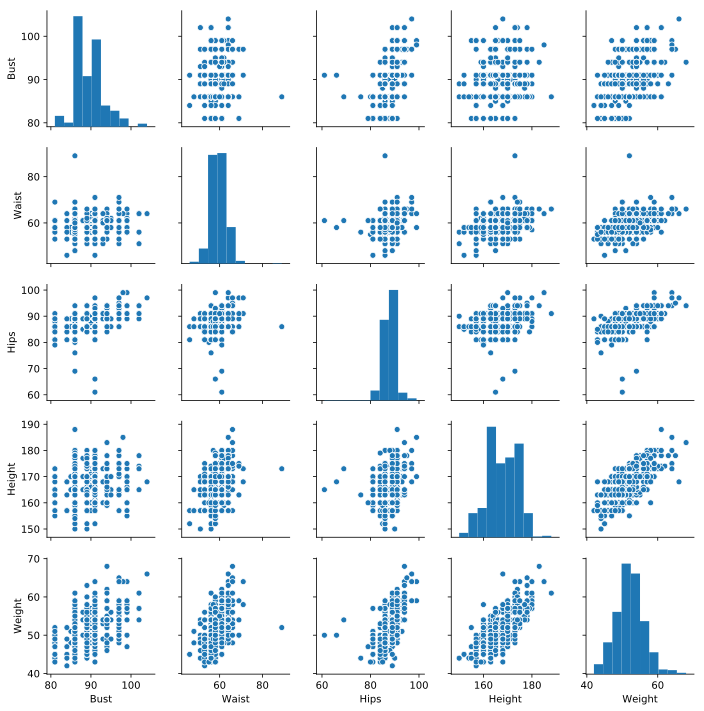

In [8]:
sns.pairplot(girls[['Bust', 'Waist', 'Hips', 'Height', 'Weight']],size=2);

**Метод boxplot**

В наборе данных все признаки численные, так что создадим категорию "weight_cat" из 3 типов веса.

In [9]:
girls['Weight'].describe()

count    604.000000
mean      52.168874
std        4.040585
min       42.000000
25%       49.000000
50%       52.000000
75%       54.000000
max       68.000000
Name: Weight, dtype: float64

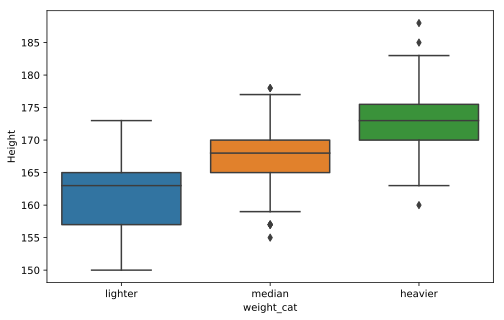

In [10]:
girls['weight_cat'] = girls['Weight'].apply(lambda x:'heavier' if x > 54 else 'lighter' if  x < 49 else 'median')
sns.boxplot(x='weight_cat', y='Height', data=girls.sort_values(by='Weight'));

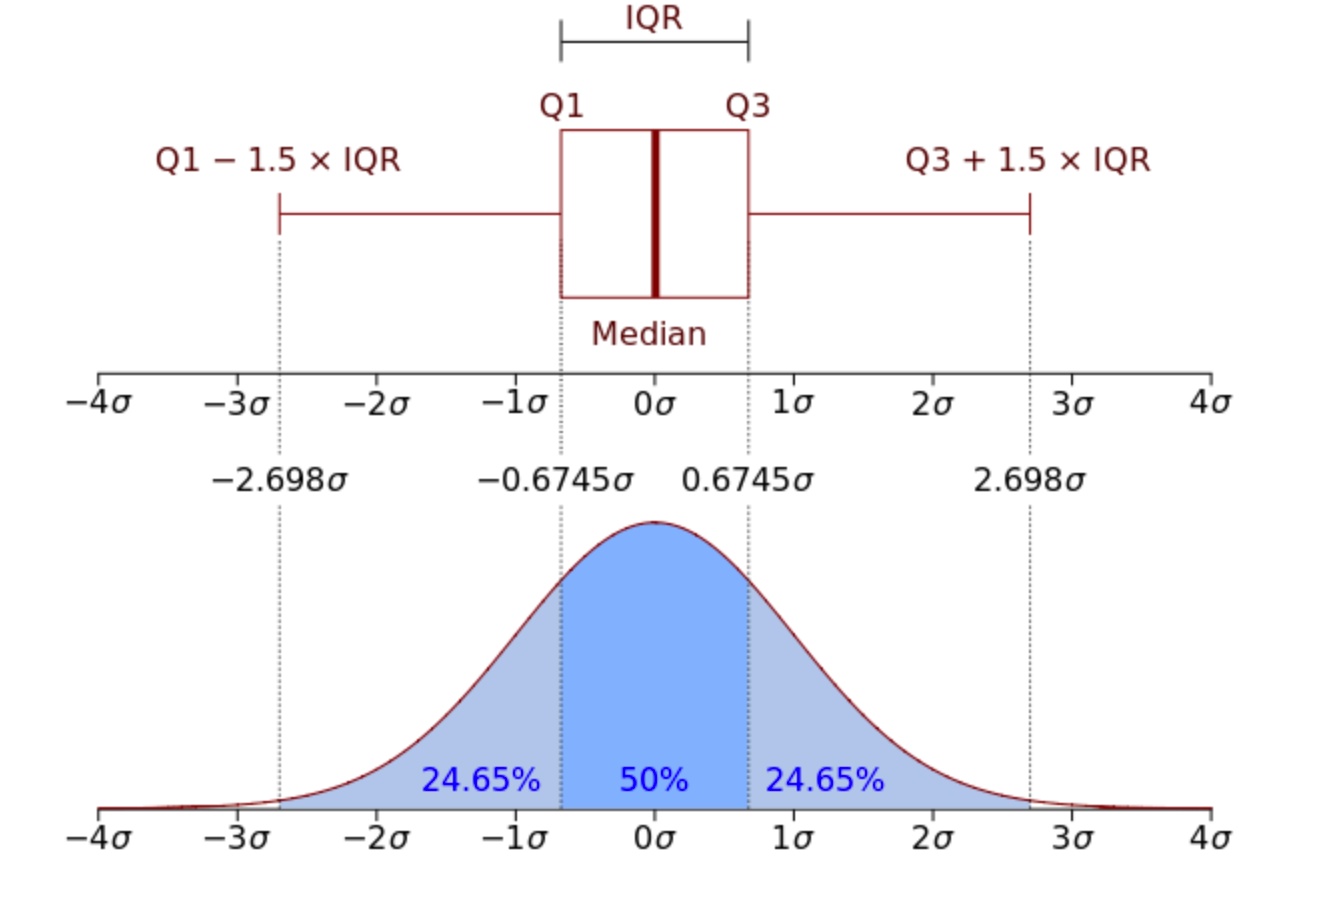

In [11]:
from IPython.display import Image
Image(filename='boxplot.png',width=700, height=700)

**Метод heatmap**

In [12]:
girls.corr()

,Year,Bust,Waist,Hips,Height,Weight
Year,1.000000,-0.461384,0.314772,-0.310939,0.306172,-0.005168
Bust,-0.461384,1.000000,0.062017,0.455448,0.090848,0.408590
Waist,0.314772,0.062017,1.000000,0.287631,0.374636,0.468535
Hips,-0.310939,0.455448,0.287631,1.000000,0.231788,0.549841
Height,0.306172,0.090848,0.374636,0.231788,1.000000,0.709458
Weight,-0.005168,0.408590,0.468535,0.549841,0.709458,1.000000


In [13]:
corr_matrix = girls.corr()

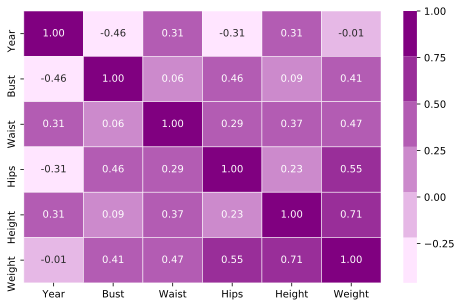

In [14]:
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=.5, cmap=sns.light_palette("purple"));

## Ссылки:
- [Тьюториалы](https://stanford.edu/~mwaskom/software/seaborn/tutorial.html) из документации Seaborn
- [Статья](https://habrahabr.ru/post/266289/) на Хабрахабре "Работа с данными среднего размера в Python. Pandas и Seaborn" (Александр Кукушкин)